In this lab, we will use 'twarc' Python package to interact with Twitter API v2.

We will use Search Tweets --> Recent search (endpoint)

This API endpoint:
- (By default) Retrieves 10 tweets in the recent 7 days
- (By setting max_results to 100) Can retrieve up to 100 tweets per API request

Ref: https://twarc-project.readthedocs.io/en/latest/api/client2/#twarc.client2.Twarc2.search_recent

Ref: https://www.youtube.com/watch?v=guHH51GDDI0

Ref: https://catriscode.com/2021/05/01/tweets-cleaning-with-python/

In [1]:
import plotly.graph_objects as go
from twarc import Twarc2

In [2]:
# Paste in your own bearer token below
client = Twarc2(
    bearer_token = 'AAAAAAAAAAAAAAAAAAAAAFcTlQEAAAAALP2qUZX5P8Tbl71LhX08vBf%2BvUw%3DCXKp7Y8C7X5jOxM4lgVOFWm2a8fMVPuzFK1HhWAtf9rCzY4bgZ'
)

In [3]:
query = 'covid lang=en'

In [4]:
results = client.search_recent(
    query=query,
    max_results=100,
    tweet_fields="author_id,context_annotations"
)

In [5]:
for page in results:
    print("======================")
    print(page)
    data = page['data']

{'data': [{'id': '1625045271246737411', 'edit_history_tweet_ids': ['1625045271246737411'], 'entities': {'mentions': [{'start': 3, 'end': 15, 'username': 'NateB_Panic', 'id': '1543531119294939137'}]}, 'author_id': '1372362997', 'referenced_tweets': [{'type': 'retweeted', 'id': '1624714210130239488'}], 'text': 'RT @NateB_Panic: “Excess death is due to healthcare system collapses.” Starving health systems of cash doesn’t help, but excess death in 20…'}, {'id': '1625045144914255872', 'edit_history_tweet_ids': ['1625045144914255872'], 'entities': {'mentions': [{'start': 3, 'end': 15, 'username': 'NateB_Panic', 'id': '1543531119294939137'}]}, 'author_id': '4839925769', 'referenced_tweets': [{'type': 'retweeted', 'id': '1624714210130239488'}], 'text': 'RT @NateB_Panic: “Excess death is due to healthcare system collapses.” Starving health systems of cash doesn’t help, but excess death in 20…'}, {'id': '1625026704853856258', 'edit_history_tweet_ids': ['1625026704853856258'], 'entities': {'menti

{'data': [{'edit_history_tweet_ids': ['1623870014154473476'], 'author_id': '743946319', 'id': '1623870014154473476', 'text': 'RT @wilko_wedyn: @M_Muszalski https://t.co/30CCO9UZcc\n\nhttps://t.co/o92SczHFyJ\n\nhttps://t.co/TYrudSOsoU\n\nhttps://t.co/KgCEEreGQX\n\nhttps://t…', 'entities': {'mentions': [{'start': 3, 'end': 15, 'username': 'wilko_wedyn', 'id': '1374041856804331524'}, {'start': 17, 'end': 29, 'username': 'M_Muszalski', 'id': '1910795154'}]}, 'referenced_tweets': [{'type': 'retweeted', 'id': '1623717966968676352'}]}, {'edit_history_tweet_ids': ['1623865867615326208'], 'author_id': '1438261915856379913', 'id': '1623865867615326208', 'text': 'RT @wilko_wedyn: @M_Muszalski https://t.co/30CCO9UZcc\n\nhttps://t.co/o92SczHFyJ\n\nhttps://t.co/TYrudSOsoU\n\nhttps://t.co/KgCEEreGQX\n\nhttps://t…', 'entities': {'mentions': [{'start': 3, 'end': 15, 'username': 'wilko_wedyn', 'id': '1374041856804331524'}, {'start': 17, 'end': 29, 'username': 'M_Muszalski', 'id': '1910795154'}]}, 'refer

In [6]:
len(data)

58

In [7]:
# Convert JSON into Pandas data frame

import pandas as pd

df = pd.json_normalize(data)

df

,edit_history_tweet_ids,author_id,id,text,referenced_tweets,entities.mentions,context_annotations,geo.place_id,attachments.media_keys,in_reply_to_user_id
0,[1623870014154473476],743946319,1623870014154473476,RT @wilko_wedyn: @M_Muszalski https://t.co/30C...,"[{'type': 'retweeted', 'id': '1623717966968676...","[{'start': 3, 'end': 15, 'username': 'wilko_we...",NaN,NaN,NaN,NaN
1,[1623865867615326208],1438261915856379913,1623865867615326208,RT @wilko_wedyn: @M_Muszalski https://t.co/30C...,"[{'type': 'retweeted', 'id': '1623717966968676...","[{'start': 3, 'end': 15, 'username': 'wilko_we...",NaN,NaN,NaN,NaN
2,[1623849516381134849],384071493,1623849516381134849,Vitamin D and estrogen steroid hormones and th...,NaN,"[{'start': 123, 'end': 134, 'username': 'RedeS...","[{'domain': {'id': '123', 'name': 'Ongoing New...",cae987165260f81f,"[3_1623849510739795973, 3_1623849510731390977,...",NaN
3,[1623822498658746368],2787846346,1623822498658746368,RT @wilko_wedyn: @M_Muszalski https://t.co/30C...,"[{'type': 'retweeted', 'id': '1623717966968676...","[{'start': 3, 'end': 15, 'username': 'wilko_we...",NaN,NaN,NaN,NaN
4,[1623818448835944448],1391736686279806978,1623818448835944448,RT @wilko_wedyn: @M_Muszalski https://t.co/30C...,"[{'type': 'retweeted', 'id': '1623717966968676...","[{'start': 3, 'end': 15, 'username': 'wilko_we...",NaN,NaN,NaN,NaN
5,[1623814876228362240],1355417567859515393,1623814876228362240,RT @wilko_wedyn: @M_Muszalski https://t.co/30C...,"[{'type': 'retweeted', 'id': '1623717966968676...","[{'start': 3, 'end': 15, 'username': 'wilko_we...",NaN,NaN,NaN,NaN
6,[1623809659231510528],1442659240544509960,1623809659231510528,RT @wilko_wedyn: @M_Muszalski https://t.co/30C...,"[{'type': 'retweeted', 'id': '1623717966968676...","[{'start': 3, 'end': 15, 'username': 'wilko_we...",NaN,NaN,NaN,NaN
7,[1623806978995748865],1235121514921500672,1623806978995748865,RT @wilko_wedyn: @M_Muszalski https://t.co/30C...,"[{'type': 'retweeted', 'id': '1623717966968676...","[{'start': 3, 'end': 15, 'username': 'wilko_we...",NaN,NaN,NaN,NaN
8,[1623801968752828418],1243540723,1623801968752828418,RT @ilo: OUT NOW: World Social Protection Repo...,"[{'type': 'retweeted', 'id': '1433023917237669...","[{'start': 3, 'end': 7, 'username': 'ilo', 'id...",NaN,NaN,NaN,NaN
9,[1623794790621155328],99170877,1623794790621155328,RT @WADeptHealth: Expiration dates have been e...,"[{'type': 'retweeted', 'id': '1623727908635148...","[{'start': 3, 'end': 16, 'username': 'WADeptHe...","[{'domain': {'id': '123', 'name': 'Ongoing New...",NaN,NaN,NaN


In [8]:
# Let's retrieve just the text from each tweet
# Store each tweet text as a List item

tweet_text_list = df['text'].tolist()

tweet_text_list

['RT @wilko_wedyn: @M_Muszalski https://t.co/30CCO9UZcc\n\nhttps://t.co/o92SczHFyJ\n\nhttps://t.co/TYrudSOsoU\n\nhttps://t.co/KgCEEreGQX\n\nhttps://t…',
 'RT @wilko_wedyn: @M_Muszalski https://t.co/30CCO9UZcc\n\nhttps://t.co/o92SczHFyJ\n\nhttps://t.co/TYrudSOsoU\n\nhttps://t.co/KgCEEreGQX\n\nhttps://t…',
 'Vitamin D and estrogen steroid hormones and their immunogenetic roles in Infectious respiratory (TB and COVID-19) diseases @RedeSciELO @UFRPEOnline \nhttps://t.co/Ce9BNXSpos https://t.co/jDNiQZhYT1',
 'RT @wilko_wedyn: @M_Muszalski https://t.co/30CCO9UZcc\n\nhttps://t.co/o92SczHFyJ\n\nhttps://t.co/TYrudSOsoU\n\nhttps://t.co/KgCEEreGQX\n\nhttps://t…',
 'RT @wilko_wedyn: @M_Muszalski https://t.co/30CCO9UZcc\n\nhttps://t.co/o92SczHFyJ\n\nhttps://t.co/TYrudSOsoU\n\nhttps://t.co/KgCEEreGQX\n\nhttps://t…',
 'RT @wilko_wedyn: @M_Muszalski https://t.co/30CCO9UZcc\n\nhttps://t.co/o92SczHFyJ\n\nhttps://t.co/TYrudSOsoU\n\nhttps://t.co/KgCEEreGQX\n\nhttps://t…',
 'RT @wilko_wedyn: @M_Muszalski h

In [9]:
'''
1) Lowercasing all the letters

This step is important to make sure that all your letters are in uniform.

temp = tweet.lower()
temp
'''

'\n1) Lowercasing all the letters\n\nThis step is important to make sure that all your letters are in uniform.\n\ntemp = tweet.lower()\ntemp\n'

In [10]:
'''
2) Removing hashtags and mentions

Hashtags and mentions are common in tweets.
There are cases where you want to remove them so you only get the 
clean content of a tweet without all these elements.

You can remove these hashtags and mentions using regex.

import re

temp = re.sub("@[A-Za-z0-9_]+","", temp)
temp = re.sub("#[A-Za-z0-9_]+","", temp)
temp
'''

'\n2) Removing hashtags and mentions\n\nHashtags and mentions are common in tweets.\nThere are cases where you want to remove them so you only get the \nclean content of a tweet without all these elements.\n\nYou can remove these hashtags and mentions using regex.\n\nimport re\n\ntemp = re.sub("@[A-Za-z0-9_]+","", temp)\ntemp = re.sub("#[A-Za-z0-9_]+","", temp)\ntemp\n'

In [11]:
'''
3) Removing links

Links are usually not necessary for text processing, so it’s
better to remove them from your text.

temp = re.sub(r"http\S+", "", temp)
temp = re.sub(r"www.\S+", "", temp)
temp
'''

'\n3) Removing links\n\nLinks are usually not necessary for text processing, so it’s\nbetter to remove them from your text.\n\ntemp = re.sub(r"http\\S+", "", temp)\ntemp = re.sub(r"www.\\S+", "", temp)\ntemp\n'

In [12]:
'''
4) Removing punctuations

Depending on your needs, you may not need punctuations such as
period, comma, exclamation mark, question mark, etc.

temp = re.sub('[()!?]', ' ', temp)
temp = re.sub('\[.*?\]',' ', temp)
temp
'''

"\n4) Removing punctuations\n\nDepending on your needs, you may not need punctuations such as\nperiod, comma, exclamation mark, question mark, etc.\n\ntemp = re.sub('[()!?]', ' ', temp)\ntemp = re.sub('\\[.*?\\]',' ', temp)\ntemp\n"

In [13]:
'''
5) Filtering non-alphanumeric characters

The previous step may have removed the punctuations, including all the
non-alphanumeric characters, but just to be sure, we can remove all letters
except the alphabets (a-z) and numbers (0-9). The sign ^ below means except.

temp = re.sub("[^a-z0-9]"," ", temp)
temp
'''

'\n5) Filtering non-alphanumeric characters\n\nThe previous step may have removed the punctuations, including all the\nnon-alphanumeric characters, but just to be sure, we can remove all letters\nexcept the alphabets (a-z) and numbers (0-9). The sign ^ below means except.\n\ntemp = re.sub("[^a-z0-9]"," ", temp)\ntemp\n'

In [14]:
'''
6) Tokenization

In tokenization, you basically tokenize your text into tokens.

And what is a token? In this case, you split your text into smaller components,
for example a paragraph into a list of sentences, or a sentence into a list of words.

Library such as nltk provides functions such as word_tokenize() or sent_tokenize()
to help you with this.

However, if you just want a simple tokenizing step where you split your text 
into words into a list, then you can do it as simple as the following code.

The result will give you a list of words from your text.

temp = temp.split()
temp
'''

'\n6) Tokenization\n\nIn tokenization, you basically tokenize your text into tokens.\n\nAnd what is a token? In this case, you split your text into smaller components,\nfor example a paragraph into a list of sentences, or a sentence into a list of words.\n\nLibrary such as nltk provides functions such as word_tokenize() or sent_tokenize()\nto help you with this.\n\nHowever, if you just want a simple tokenizing step where you split your text \ninto words into a list, then you can do it as simple as the following code.\n\nThe result will give you a list of words from your text.\n\ntemp = temp.split()\ntemp\n'

In [15]:
'''
7) Stop words removal

Stop words are words that are considered unimportant to the meaning of a text.
These words may seem important to us, humans, but to machine these words may be
considered nuisance to the processing steps.

It’s also important to keep in mind that stop words are largely language-dependent.
In English, you have stop words such as for, to, and, or, in, out, etc.

Here I first defined a list of stop words in English.
Then, I match each token with each stop word.

If a token isn’t found in the list of stop words, the token gets saved,
otherwise it’s not saved. In the end, you join all the words into one text again.


stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
 
temp = [w for w in temp if not w in stopwords]
temp = " ".join(word for word in temp)
'''

'\n7) Stop words removal\n\nStop words are words that are considered unimportant to the meaning of a text.\nThese words may seem important to us, humans, but to machine these words may be\nconsidered nuisance to the processing steps.\n\nIt’s also important to keep in mind that stop words are largely language-dependent.\nIn English, you have stop words such as for, to, and, or, in, out, etc.\n\nHere I first defined a list of stop words in English.\nThen, I match each token with each stop word.\n\nIf a token isn’t found in the list of stop words, the token gets saved,\notherwise it’s not saved. In the end, you join all the words into one text again.\n\n\nstopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]\n \ntemp = [w for w in temp if not w in stopwords]\ntemp = " ".join(word for word in temp)\n'

In [16]:
'''
Text Preprocessing: From Start to Finish

I hope you understand the steps I have explained above.
Now we can combine all those lines of code into one function that we can
call and pass an argument to.

The function then returns a clean text that is ready for you to work with.

Keep in mind that the order of steps here are not absolute.
You can arrange them around depending on your text and your needs.
The code below is what I found to be the most effective on the data I
usually work with, but in case you find another pattern of data,
you can always work them out differently.
'''
import numpy as np
import re

stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

In [17]:
tweets = ["Get ready for #NatGeoEarthDay! Join us on 4/21 for an evening of music and celebration, exploration and inspiration https://on.natgeo.com/3t0wzQy.",
"Coral in the shallows of Aitutaki Lagoon, Cook Islands, Polynesia https://on.natgeo.com/3gkgq4Z",
"Don't miss our @reddit AMA with author and climber Mark Synnott who will be answering your questions about his historic journey to the North Face of Everest TODAY at 12:00pm ET! Start submitting your questions here: https://on.natgeo.com/3ddSkHk @DuttonBooks"]
 
results = [clean_tweet(tw) for tw in tweets]
results

C:\Users\hannah.kim\AppData\Local\Temp\ipykernel_932\1029021058.py:22: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['get ready join us 4 21 evening music celebration exploration inspiration',
 'coral shallows aitutaki lagoon cook islands polynesia',
 'dont miss our ama with author climber mark synnott who will be answering your questions about his historic journey north face everest today at 12 00pm et start submitting your questions here']

In [18]:
# Let's go and apply this to our own tweets
my_results = [clean_tweet(tw) for tw in tweet_text_list]
my_results

C:\Users\hannah.kim\AppData\Local\Temp\ipykernel_932\1029021058.py:22: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['rt',
 'rt',
 'vitamin d estrogen steroid hormones their immunogenetic roles infectious respiratory tb covid 19 diseases',
 'rt',
 'rt',
 'rt',
 'rt',
 'rt',
 'rt out now world social protection report 2020 22 despite unprecedented worldwide expansion social protection during covi',
 'rt expiration dates have been extended learn more you can report positive self test results onlin',
 'rt',
 'rt',
 'rt',
 'rt',
 'rt',
 'rt',
 'rt',
 'rt',
 'rt',
 'rt',
 'rt',
 'rt',
 'rt',
 'expiration dates have been extended learn more you can report positive self test results online at or 1 800 525 0127 any covid 19 positive test result can be reported even if you didnt order your test say yes covid test',
 'iedereen is negatief het is een soort collectief pessimisme mensen hebben geen gevoel van veiligheid meer',
 'rt',
 'mi ej lektury na pocz tek',
 'technical meeting future work arts entertainment sector will take place next week geneva very timely much needed discussion considering impact covid 

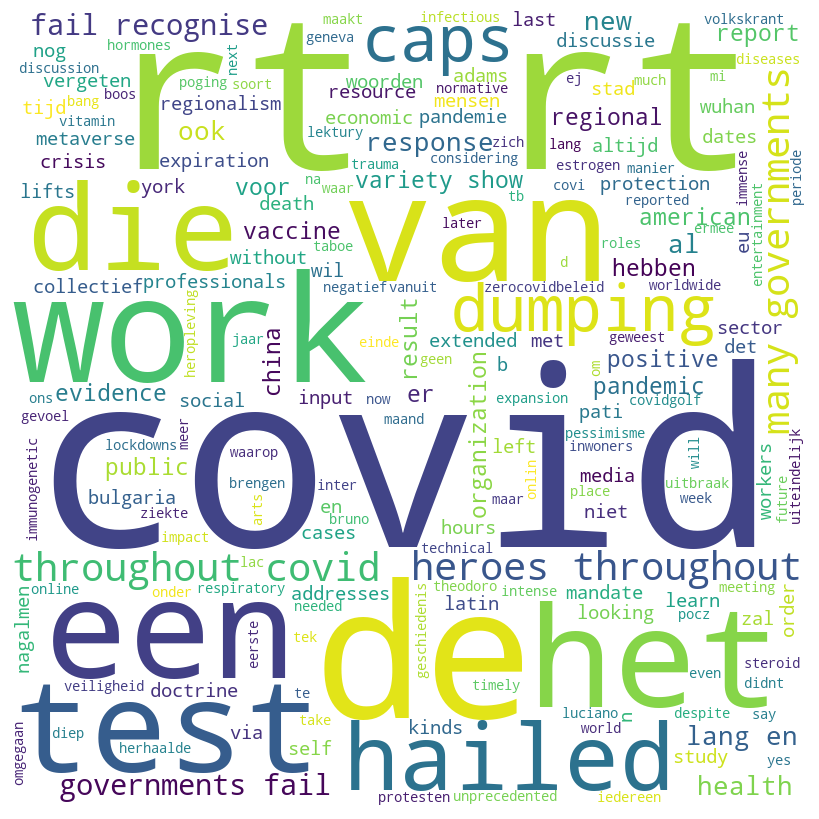

In [19]:
# importing all necessary modules

# Note that wordcloud package also provides a stop word list
# We won't be using it here - but please do explore!!!
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in my_results:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()